In [1]:
import numpy as np
import matplotlib.pyplot as plot
from scipy import signal

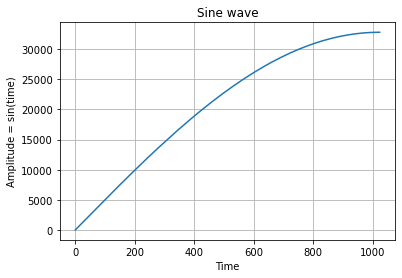

In [2]:
log_base_two = 10
N=2**log_base_two
OW = 15

multiplier = 2**OW-1

n        = np.arange(0, N);
#amplitude   = (multiplier*np.sin(2*np.pi*(2*(n/4.0))/(2*N)))
amplitude   = (multiplier*np.sin((np.pi/2)*(2*n+1)/(2*N)))
amplitude = np.around(amplitude)
amplitude = amplitude.astype(int)
plot.plot(n, amplitude)
plot.title('Sine wave')
plot.xlabel('Time')
plot.ylabel('Amplitude = sin(time)')
plot.grid(True, which='both')
plot.show()


In [3]:
#with np.printoptions(threshold=np.inf):
#    print(amplitude)

In [4]:
max(amplitude), max(n)

(32767, 1023)

In [5]:
for i in range(32):
    half_bit = i>>5 & 1
    quarter_bit = i>>4 &1

    if quarter_bit:
        idx = i^0b11111
    else:
        idx = i
    #print (format(i, '05b'), format(idx, '05b'))

In [6]:
total_cycles = 100*N
total_cycle_array = [None]*total_cycles
index_log = np.arange(0, total_cycles);
for i in range(total_cycles):
    half_bit = i>>(log_base_two+1) & 1
    quarter_bit = i>>(log_base_two-0) &1

    if quarter_bit:
        idx = ~i
    else:
        idx = i
    
    truncated_index_to_qtr_bits = idx&(2**log_base_two-1)
    index_log[i] = idx
    if half_bit:
        total_cycle_array[i] = -amplitude[truncated_index_to_qtr_bits]
    else:
        total_cycle_array[i] = amplitude[truncated_index_to_qtr_bits]

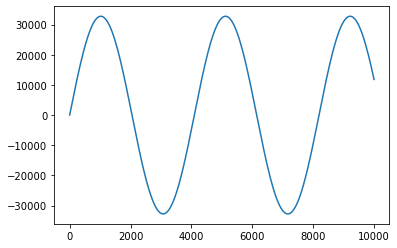

In [7]:
plot.plot(total_cycle_array[0:10000])


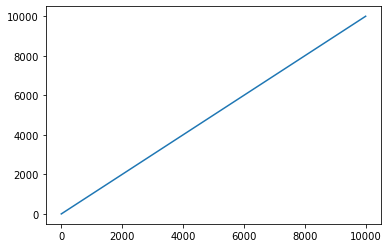

In [8]:
abs_index_log = np.abs(index_log)
plot.plot(abs_index_log[0:10000])

In [9]:
#with np.printoptions(threshold=np.inf):
    #print(abs_index_log[0:3000])

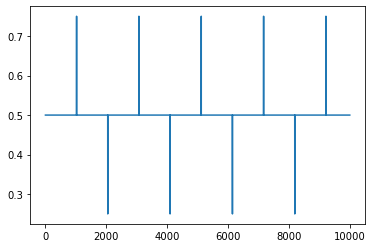

In [10]:
derivative = np.gradient(abs_index_log, 2)
plot.plot(derivative[0:10000])

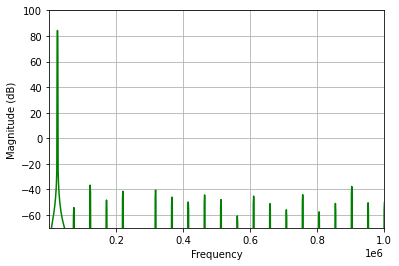

In [11]:
plot.magnitude_spectrum(total_cycle_array, color ='green', Fs=100e6, scale='dB') 
plot.xlim(100,1e6)
plot.ylim(-70,100)
plot.grid(True, which='both')


In [12]:
with open("../rtl/quarterwav.hex", "w") as f: 
    for idx, sample in enumerate(amplitude):
        f.write("@"+format(idx, 'x')+" "+ format(sample, 'x')+"\n") 


In [231]:
with open("../rtl/quarterwav.v", "w") as f:
    f.write("module quarterwav(clk, addr, data);\n")
    f.write("  input wire clk;\n") 
    f.write("  input wire ["+str(log_base_two-1)+":0] addr;\n") 
    f.write("  output reg ["+str(OW-1)+":0] data;\n") 
    f.write("  always @(posedge clk) begin\n") 
    f.write("    case (addr)\n") 
    
    for idx, sample in enumerate(amplitude):
        f.write("      "+str(idx) + " : data <= "+str(OW)+"'d"+str(sample)+";\n") 
    
    f.write("      default : data <= "+str(OW)+"'d0;\n") 
    f.write("    endcase\n") 
    f.write("  end\n") 
    f.write("endmodule\n") 